# WeatherPy
----

### Analysis
* After running all the analysis the conclusion was not a surprise - the weather becomes much warmer as we approache the equator. 

* There is no strong relationship between the latitude and cloudiness. 

* I have not discovered a strong relationship between latitude and wind speed. The strongest wind speed (approximately between 20 mph and 35 mph) sits somehwere between 60 and 70 latitude, however.

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
#List for holding lat_lngs and cities
lat_lngs = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

cities = []
countries = []

# Identify nearest city for each lat, lng combination
for lat_lngs in lat_lngs:
    lat, lon = lat_lngs
    name = citipy.nearest_city(lat, lon).city_name
    country_code = citipy.nearest_city(lat, lon).country_code
    cities.append(name)
    countries.append(country_code)
cities_df = pd.DataFrame({"City": cities, "Country": countries})  

# Drop any duplicate values
cities_df = cities_df.drop_duplicates('City')

# Visualize the data frame
cities_df.head(2)


,City,Country
0,ushuaia,ar
1,sao filipe,cv


In [5]:

# # ~~~~~~~~~~~~~~~~~~~~~ METHOD 1 - DICTIONARY ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# query_url = f"{url}appid={api_key}&units={units}&q="

# cities_and_countries = []
# for city in cities[:50]:
#     response = requests.get(query_url + city).json()    
#     try:
#         const_cities = {}
#         const_cities["city"] = response["name"]
#         const_cities["country"] = response["sys"]["country"]
#         const_cities["Lat"] = response["coord"]["lat"]
#         const_cities["Lng"] = response["coord"]["lon"]
#         const_cities["Humidity"] = response["main"]["humidity"]
#         const_cities["Max Temp"] = response["main"]["temp_max"]
#         const_cities["Wind Speed"] = response["wind"]["speed"]
#         const_cities["Cloudiness"] = response["clouds"]["all"]
#         cities_and_countries.append(const_cities)
#     except:
#         print("City not found. Skipping...")
#         continue
#     if len(const_cities) % 50 == 0:
#         print("PAUSE")
#         time.sleep(30)

In [6]:
# # ~~~~~~~~~~~~~~~~~~~~~ METHOD 2 - LISTS ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# cities_new = []
# countries_new = []
# lats = []

# url = "http://api.openweathermap.org/data/2.5/weather?"
# units = "metric"
# query_url = f"{url}appid={api_key}&units={units}&q="

# for city in cities[:50]:
#     response = requests.get(query_url + city).json()    
#     try:
#         cities_new.append(response["name"])
#         countries_new.append(response["sys"]["country"])
#         lats.append(response["coord"]["lat"])
# #     except Exception as e:
#     except:
# #         print(e)
#         print("Skipping...")
#         continue


In [16]:
# Creating a new DataFrame
cities_df["Date"] = ""
cities_df['Lat'] = ""
cities_df["Lng"] = ""
cities_df["Humidity"] = ""
cities_df["Wind Speed"] = ""
cities_df["Cloudiness"] = ""
cities_df["Max Temp"] = ""

cities_df.head(2)

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,ushuaia,ar,,,,,,,
1,sao filipe,cv,,,,,,,


In [8]:
# ~~~~~~~~~~~~~~~~~~~~~ METHOD 3 - DataFrame ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


row_count = 0

print("DATA RETRIEVAL")
print("~~~~~~~~~~~~~~~~~~~~~~~")

# Loop through the cities and perform API Calls
for index, row in cities_df.iterrows():
    target_url = "http://api.openweathermap.org/data/2.5/weather?q=%s&units=IMPERIAL&appid=%s" %(row["City"], api_key)
    response = requests.get(target_url).json()
    print("----------------------")
    print("Now retrieving city #%s: %s" % (row_count + 1, cities_df.loc[index]["City"]))
    print(target_url)
    row_count += 1
    
    try:     
        cities_df.set_value(index, "Lat", response["coord"]["lat"])
        cities_df.set_value(index, "Lng", response["coord"]["lon"])
        cities_df.set_value(index, "Date", response["dt"])
        cities_df.set_value(index, "Humidity", response["main"]["humidity"])
        cities_df.set_value(index, "Max Temp", response["main"]["temp_max"])
        cities_df.set_value(index, "Wind Speed", response["wind"]["speed"])
        cities_df.set_value(index, "Cloudiness", response["clouds"]["all"])
           
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        
    if row_count % 50 == 0:
        print("~~~~~~~~~~~~~~~~~~~~~~~~")
        print("PAUSE")
        time.sleep(30)
        
print("~~~~~~~~~~~~~~~~~~~~~~~~")
print("DATA RETRIEVAL COMPLETE")


DATA RETRIEVAL
~~~~~~~~~~~~~~~~~~~~~~~
----------------------
Now retrieving city #1: ushuaia
http://api.openweathermap.org/data/2.5/weather?q=ushuaia&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3


/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[

----------------------
Now retrieving city #2: sao filipe
http://api.openweathermap.org/data/2.5/weather?q=sao filipe&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #3: lambarene
http://api.openweathermap.org/data/2.5/weather?q=lambarene&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #4: hobart
http://api.openweathermap.org/data/2.5/weather?q=hobart&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #5: senanga
http://api.openweathermap.org/data/2.5/weather?q=senanga&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #6: rawlins
http://api.openweathermap.org/data/2.5/weather?q=rawlins&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #7: busselton
http://api.openweathermap.org/data/2.5/weather?q=busselton&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3

----------------------
Now retrieving city #50: hasaki
http://api.openweathermap.org/data/2.5/weather?q=hasaki&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
~~~~~~~~~~~~~~~~~~~~~~~~
PAUSE
----------------------
Now retrieving city #51: flagstaff
http://api.openweathermap.org/data/2.5/weather?q=flagstaff&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #52: arraial do cabo
http://api.openweathermap.org/data/2.5/weather?q=arraial do cabo&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #53: rikitea
http://api.openweathermap.org/data/2.5/weather?q=rikitea&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #54: adet
http://api.openweathermap.org/data/2.5/weather?q=adet&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #55: mackay
http://api.openweathermap.org/data/2.5/weather?q=mackay&units=IMPER

----------------------
Now retrieving city #98: castro
http://api.openweathermap.org/data/2.5/weather?q=castro&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #99: san joaquin
http://api.openweathermap.org/data/2.5/weather?q=san joaquin&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #100: rancho palos verdes
http://api.openweathermap.org/data/2.5/weather?q=rancho palos verdes&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
~~~~~~~~~~~~~~~~~~~~~~~~
PAUSE
----------------------
Now retrieving city #101: palmer
http://api.openweathermap.org/data/2.5/weather?q=palmer&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #102: tuatapere
http://api.openweathermap.org/data/2.5/weather?q=tuatapere&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #103: polson
http://api.openweathermap.org/data/2.5/weat

----------------------
Now retrieving city #145: bulaevo
http://api.openweathermap.org/data/2.5/weather?q=bulaevo&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #146: khanpur
http://api.openweathermap.org/data/2.5/weather?q=khanpur&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #147: margate
http://api.openweathermap.org/data/2.5/weather?q=margate&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #148: hithadhoo
http://api.openweathermap.org/data/2.5/weather?q=hithadhoo&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #149: luanda
http://api.openweathermap.org/data/2.5/weather?q=luanda&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #150: carnarvon
http://api.openweathermap.org/data/2.5/weather?q=carnarvon&units=IMPERIAL&appid=b6efcd0fa8c7d0e3227

----------------------
Now retrieving city #192: coahuayana
http://api.openweathermap.org/data/2.5/weather?q=coahuayana&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #193: bud
http://api.openweathermap.org/data/2.5/weather?q=bud&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #194: oranjestad
http://api.openweathermap.org/data/2.5/weather?q=oranjestad&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #195: chuy
http://api.openweathermap.org/data/2.5/weather?q=chuy&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #196: vrangel
http://api.openweathermap.org/data/2.5/weather?q=vrangel&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #197: inuvik
http://api.openweathermap.org/data/2.5/weather?q=inuvik&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a5

----------------------
Now retrieving city #239: mozelos
http://api.openweathermap.org/data/2.5/weather?q=mozelos&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #240: kavaratti
http://api.openweathermap.org/data/2.5/weather?q=kavaratti&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #241: bilma
http://api.openweathermap.org/data/2.5/weather?q=bilma&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #242: mundo nuevo
http://api.openweathermap.org/data/2.5/weather?q=mundo nuevo&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #243: solovetskiy
http://api.openweathermap.org/data/2.5/weather?q=solovetskiy&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
'coord'
City not found. Skipping...
----------------------
Now retrieving city #244: atambua
http://api.openweathermap.org/data/2.5/weather?q=at

----------------------
Now retrieving city #285: taoudenni
http://api.openweathermap.org/data/2.5/weather?q=taoudenni&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #286: yazykovo
http://api.openweathermap.org/data/2.5/weather?q=yazykovo&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #287: banyo
http://api.openweathermap.org/data/2.5/weather?q=banyo&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #288: sfantu gheorghe
http://api.openweathermap.org/data/2.5/weather?q=sfantu gheorghe&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #289: yamada
http://api.openweathermap.org/data/2.5/weather?q=yamada&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #290: srednekolymsk
http://api.openweathermap.org/data/2.5/weather?q=srednekolymsk&units=IMPERIAL&app

----------------------
Now retrieving city #333: tuktoyaktuk
http://api.openweathermap.org/data/2.5/weather?q=tuktoyaktuk&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #334: pudem
http://api.openweathermap.org/data/2.5/weather?q=pudem&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #335: tura
http://api.openweathermap.org/data/2.5/weather?q=tura&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #336: la palma
http://api.openweathermap.org/data/2.5/weather?q=la palma&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #337: horsham
http://api.openweathermap.org/data/2.5/weather?q=horsham&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #338: vila velha
http://api.openweathermap.org/data/2.5/weather?q=vila velha&units=IMPERIAL&appid=b6efcd0fa8c7d0e3227

----------------------
Now retrieving city #380: mishan
http://api.openweathermap.org/data/2.5/weather?q=mishan&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #381: phan rang
http://api.openweathermap.org/data/2.5/weather?q=phan rang&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
'coord'
City not found. Skipping...
----------------------
Now retrieving city #382: pokhara
http://api.openweathermap.org/data/2.5/weather?q=pokhara&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #383: marystown
http://api.openweathermap.org/data/2.5/weather?q=marystown&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #384: ahipara
http://api.openweathermap.org/data/2.5/weather?q=ahipara&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #385: mkokotoni
http://api.openweathermap.org/data/2.5/weather?q=mkokotoni&

----------------------
Now retrieving city #427: shadrinsk
http://api.openweathermap.org/data/2.5/weather?q=shadrinsk&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #428: duz
http://api.openweathermap.org/data/2.5/weather?q=duz&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
'coord'
City not found. Skipping...
----------------------
Now retrieving city #429: kikwit
http://api.openweathermap.org/data/2.5/weather?q=kikwit&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #430: narsaq
http://api.openweathermap.org/data/2.5/weather?q=narsaq&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #431: tupancireta
http://api.openweathermap.org/data/2.5/weather?q=tupancireta&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #432: turkistan
http://api.openweathermap.org/data/2.5/weather?q=turkistan&units=

----------------------
Now retrieving city #474: savalou
http://api.openweathermap.org/data/2.5/weather?q=savalou&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #475: waipawa
http://api.openweathermap.org/data/2.5/weather?q=waipawa&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #476: vila
http://api.openweathermap.org/data/2.5/weather?q=vila&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #477: dalby
http://api.openweathermap.org/data/2.5/weather?q=dalby&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #478: lerwick
http://api.openweathermap.org/data/2.5/weather?q=lerwick&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #479: morant bay
http://api.openweathermap.org/data/2.5/weather?q=morant bay&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a5

----------------------
Now retrieving city #522: severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?q=severo-kurilsk&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #523: kathu
http://api.openweathermap.org/data/2.5/weather?q=kathu&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #524: gusau
http://api.openweathermap.org/data/2.5/weather?q=gusau&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #525: forbes
http://api.openweathermap.org/data/2.5/weather?q=forbes&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #526: black river
http://api.openweathermap.org/data/2.5/weather?q=black river&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #527: sananduva
http://api.openweathermap.org/data/2.5/weather?q=sananduva&units=IMPERIAL&appid=b6efcd0fa

----------------------
Now retrieving city #569: antalaha
http://api.openweathermap.org/data/2.5/weather?q=antalaha&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #570: bratsk
http://api.openweathermap.org/data/2.5/weather?q=bratsk&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #571: miri
http://api.openweathermap.org/data/2.5/weather?q=miri&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #572: gamba
http://api.openweathermap.org/data/2.5/weather?q=gamba&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
----------------------
Now retrieving city #573: orgun
http://api.openweathermap.org/data/2.5/weather?q=orgun&units=IMPERIAL&appid=b6efcd0fa8c7d0e32275b8ea3b5a53e3
'coord'
City not found. Skipping...
----------------------
Now retrieving city #574: grand-santi
http://api.openweathermap.org/data/2.5/weather?q=grand-santi&units=IMPERIAL&a

In [14]:
cities_df.head(2)

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,ushuaia,ar,1.556226e+09,-54.81,-68.31,58.0,18.34,0.0,53.60
1,sao filipe,cv,1.556229e+09,14.90,-24.50,81.0,20.27,15.0,72.05


In [10]:
# Replace empty rows with NuN
cities_df['Date'].replace('', np.nan, inplace=True)
cities_df['Lat'].replace('', np.nan, inplace=True)
cities_df['Lng'].replace('', np.nan, inplace=True)
cities_df['Humidity'].replace('', np.nan, inplace=True)
cities_df['Wind Speed'].replace('', np.nan, inplace=True)
cities_df['Cloudiness'].replace('', np.nan, inplace=True)
cities_df['Max Temp'].replace('', np.nan, inplace=True)

cities_df.head(2)

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,ushuaia,ar,1.556226e+09,-54.81,-68.31,58.0,18.34,0.0,53.60
1,sao filipe,cv,1.556229e+09,14.90,-24.50,81.0,20.27,15.0,72.05


In [11]:
# Dropn NaN Rows
clean_cities_df = cities_df.dropna()
clean_cities_df.head(30)

,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,ushuaia,ar,1.556226e+09,-54.81,-68.31,58.0,18.34,0.0,53.60
1,sao filipe,cv,1.556229e+09,14.90,-24.50,81.0,20.27,15.0,72.05
2,lambarene,ga,1.556229e+09,-0.70,10.22,96.0,2.51,100.0,76.37
3,hobart,au,1.556229e+09,-42.88,147.33,66.0,18.34,20.0,46.40
5,senanga,zm,1.556229e+09,-16.10,23.30,47.0,4.09,2.0,73.85
6,rawlins,us,1.556228e+09,41.79,-107.24,21.0,14.99,40.0,62.60
7,busselton,au,1.556229e+09,-33.64,115.35,53.0,19.19,0.0,57.00
9,cidreira,br,1.556229e+09,-30.17,-50.22,86.0,13.65,100.0,72.41
11,sydney,au,1.556229e+09,-33.85,151.22,88.0,8.05,0.0,66.99
13,thompson,ca,1.556226e+09,55.74,-97.86,31.0,5.82,90.0,33.80


In [13]:
# clean_cities_df['Date'] = clean_cities_df['Date'].astype('datetime64[ns]')
# clean_cities_df
clean_cities_df['Date'] = pd.to_datetime(clean_cities_df['Date'], unit='s')
clean_cities_df.head(2)

/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,City,Country,Date,Lat,Lng,Humidity,Wind Speed,Cloudiness,Max Temp
0,ushuaia,ar,2019-04-25 21:00:00,-54.81,-68.31,58.0,18.34,0.0,53.60
1,sao filipe,cv,2019-04-25 21:54:44,14.90,-24.50,81.0,20.27,15.0,72.05


In [14]:
# converting DataFrame to csv
clean_cities_df.to_csv("clean_cities.csv", index=False, header=True)

#### Latitude vs. Temperature Plot

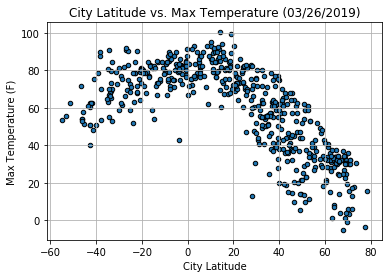

In [15]:
ax1 = cities_df.plot.scatter(x='Lat',
                       y='Max Temp',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Max Temperature (03/26/2019)")
plt.xlabel("City Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

In [16]:
# Save picture
plt.savefig('City Latitude vs. Max Temperature.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

In [1]:
ax2 = clean_cities_df.plot.scatter(x='Lat',
                       y='Humidity',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Humidity (03/26/2019)")
plt.xlabel("City Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(0, 105)
plt.grid()

NameError: name 'clean_cities_df' is not defined

In [18]:
# Save picture
plt.savefig('City Latitude vs. Humidity.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

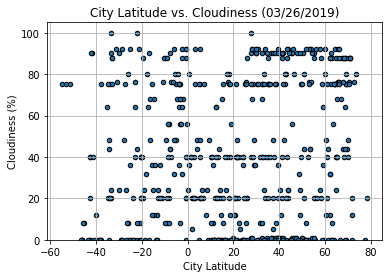

In [19]:
ax3 = clean_cities_df.plot.scatter(x='Lat',
                       y='Cloudiness',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Cloudiness (03/26/2019)")
plt.xlabel("City Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0, 105)
plt.grid()

In [20]:
# Save picture
plt.savefig('City Latitude vs. Cloudiness.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

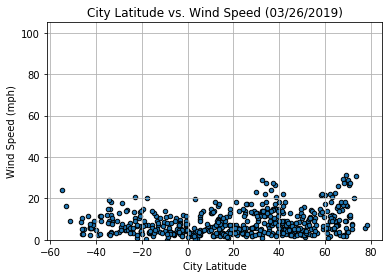

In [21]:
ax4 = clean_cities_df.plot.scatter(x='Lat',
                       y='Wind Speed',
                       facecolors="blue", marker="o", edgecolors="black", alpha=1)
plt.title("City Latitude vs. Wind Speed (03/26/2019)")
plt.xlabel("City Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0, 105)
plt.grid()

In [22]:
# Save picture
plt.savefig('City Latitude vs. Wind Speed.png')

<Figure size 432x288 with 0 Axes>